In [203]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset

combined_df = pd.merge(trial_df, mouse_df, on="Mouse ID")
combined_df = combined_df.astype({"Metastatic Sites": float})

# Display the data table for preview

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0.0,Capomulin
1,b128,5,45.651331,0.0,Capomulin
2,b128,10,43.270852,0.0,Capomulin
3,b128,15,43.784893,0.0,Capomulin
4,b128,20,42.731552,0.0,Capomulin


### Tumor Response to Treatment

In [192]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor_volume = combined_df.groupby(['Drug','Timepoint'], as_index=False)['Tumor Volume (mm3)'].mean()

# Convert to DataFrame

mean_tumor_volume.head()
# Preview DataFrame


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [193]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem_tumor_volume = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].std()

sem_tumor_volume = sem_tumor_volume/len(np.sqrt(sem_tumor_volume))

# Convert to DataFrame

sem_tumor_volume = sem_tumor_volume.reset_index()


# Preview DataFrame
sem_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.022430
2,Capomulin,10,0.035134
3,Capomulin,15,0.041084
4,Capomulin,20,0.043629


### 

In [312]:
# Minor Data Munging to Re-Format the Data Frames
transposed_mean_tumor_volume = mean_tumor_volume
transposed_mean_tumor_volume = transposed_mean_tumor_volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

transposed_sem_tumor_volume = sem_tumor_volume
transposed_sem_tumor_volume = transposed_sem_tumor_volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
transposed_mean_tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


### 

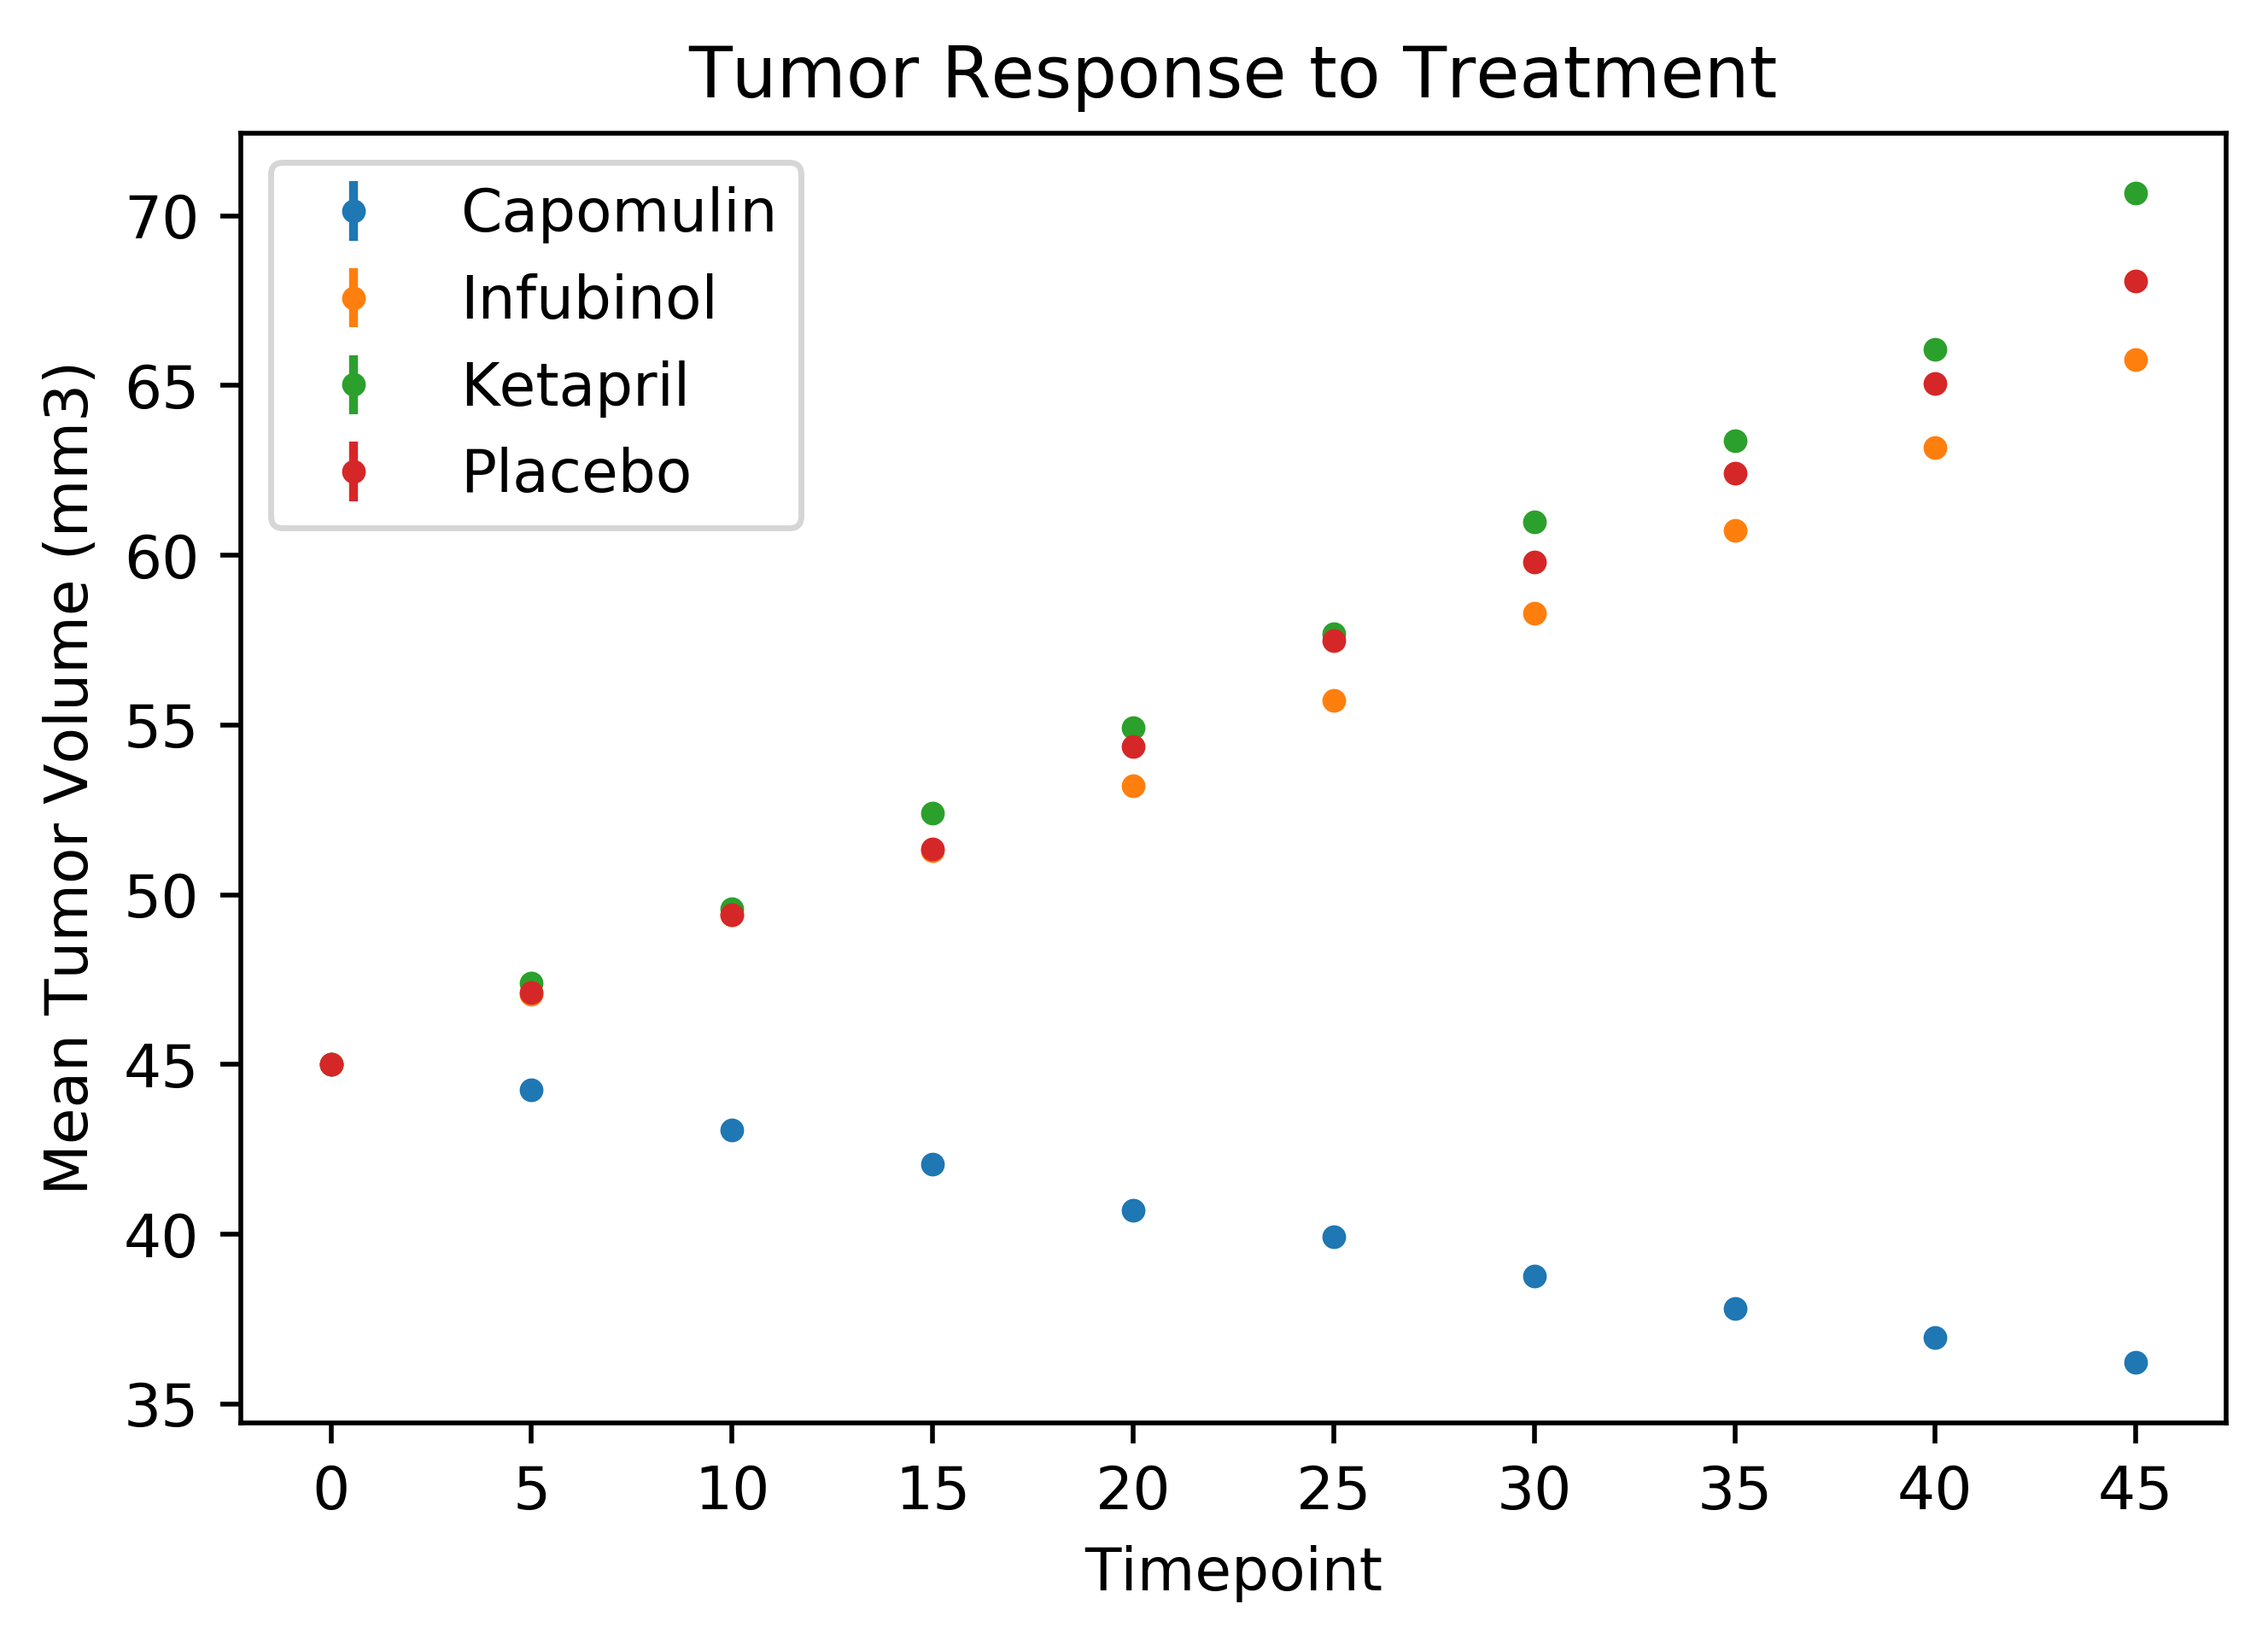

<Figure size 3000x2000 with 0 Axes>

In [328]:
# Generate the Plot (with Error Bars)

drug_names = ["Capomulin","Infubinol","Ketapril","Placebo"]

x_axis = transposed_mean_tumor_volume.index

fig, ax = plt.subplots()

for drug in drug_names:
    ax.errorbar(x_axis, transposed_mean_tumor_volume[drug], transposed_sem_tumor_volume[drug], fmt='.', label=drug)

# Save the Figure
plt.xticks(np.arange(0, 50, step=5))
plt.xlabel('Timepoint')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 500
plt.title('Tumor Response to Treatment')
# Show the Figure
plt.show()
plt.savefig('Tumor Response.png')

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [225]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_met_site = combined_df.groupby(['Drug','Timepoint'], as_index=False)['Metastatic Sites'].mean()

# Convert to DataFrame

# Preview DataFrame
mean_met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [227]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

sem_met_site = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].std()

sem_met_site = sem_met_site/len(np.sqrt(sem_met_site))

# Convert to DataFrame

sem_met_site = sem_met_site.reset_index()

# Preview DataFrame
sem_met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.003742
2,Capomulin,10,0.006272
3,Capomulin,15,0.006469
4,Capomulin,20,0.007751


In [229]:
transposed_mean_met_site = mean_met_site
transposed_mean_met_site = transposed_mean_met_site.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

transposed_sem_met_site = sem_met_site
transposed_sem_met_site = transposed_sem_met_site.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
transposed_mean_met_site.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


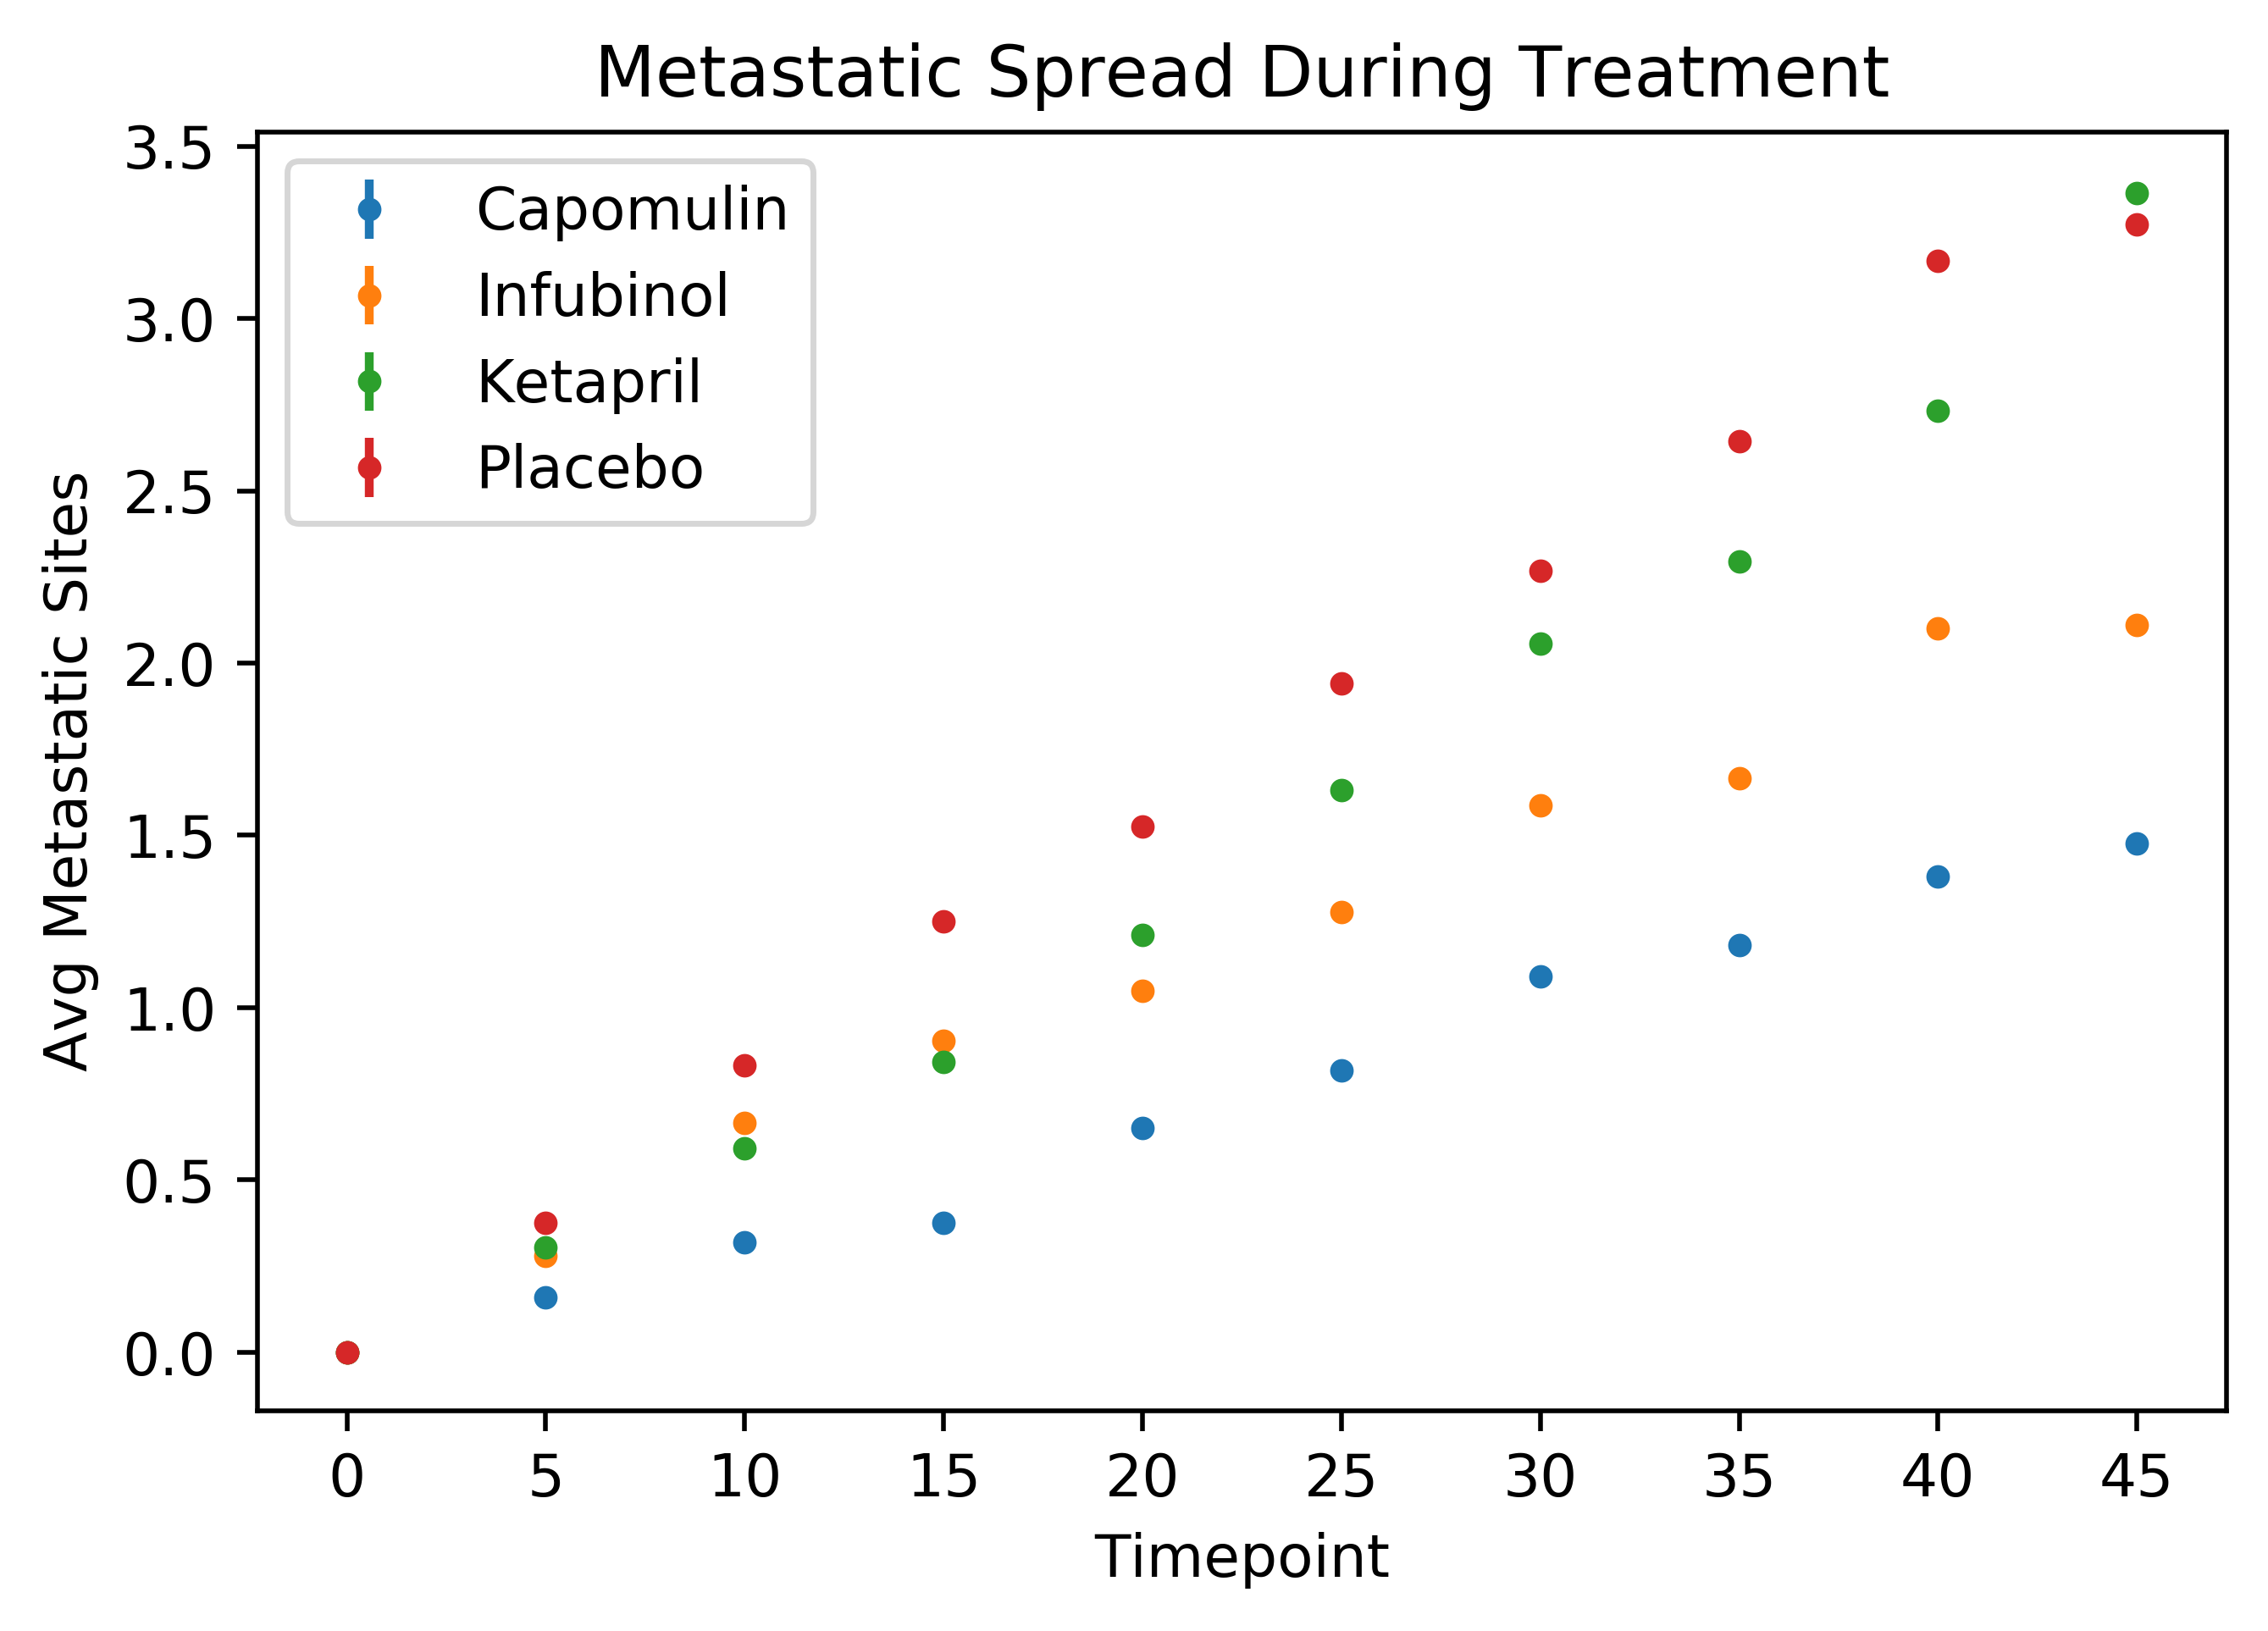

In [320]:
x_axis = transposed_mean_met_site.index

fig, ax = plt.subplots()

for drug in drug_names:
    ax.errorbar(x_axis, transposed_mean_met_site[drug], transposed_sem_met_site[drug], fmt='.', label=drug)

plt.xticks(np.arange(0, 50, step=5))
plt.legend(loc='upper left')
plt.xlabel('Timepoint')
plt.ylabel('Avg Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.rcParams['figure.dpi'] = 500

# Save the Figure
plt.savefig('Metastatic Spread.png')
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [247]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

by_mouse = combined_df.groupby(['Drug','Timepoint'], as_index=False)
by_mouse = by_mouse['Mouse ID'].agg('count')
by_mouse.rename(columns={'Mouse ID':'Mouse Count'}, inplace=True)
# Convert to DataFrame

# Preview DataFrame
by_mouse.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [259]:
# Minor Data Munging to Re-Format the Data Frames

transposed_by_mouse = by_mouse
transposed_by_mouse = transposed_by_mouse.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
transposed_by_mouse


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


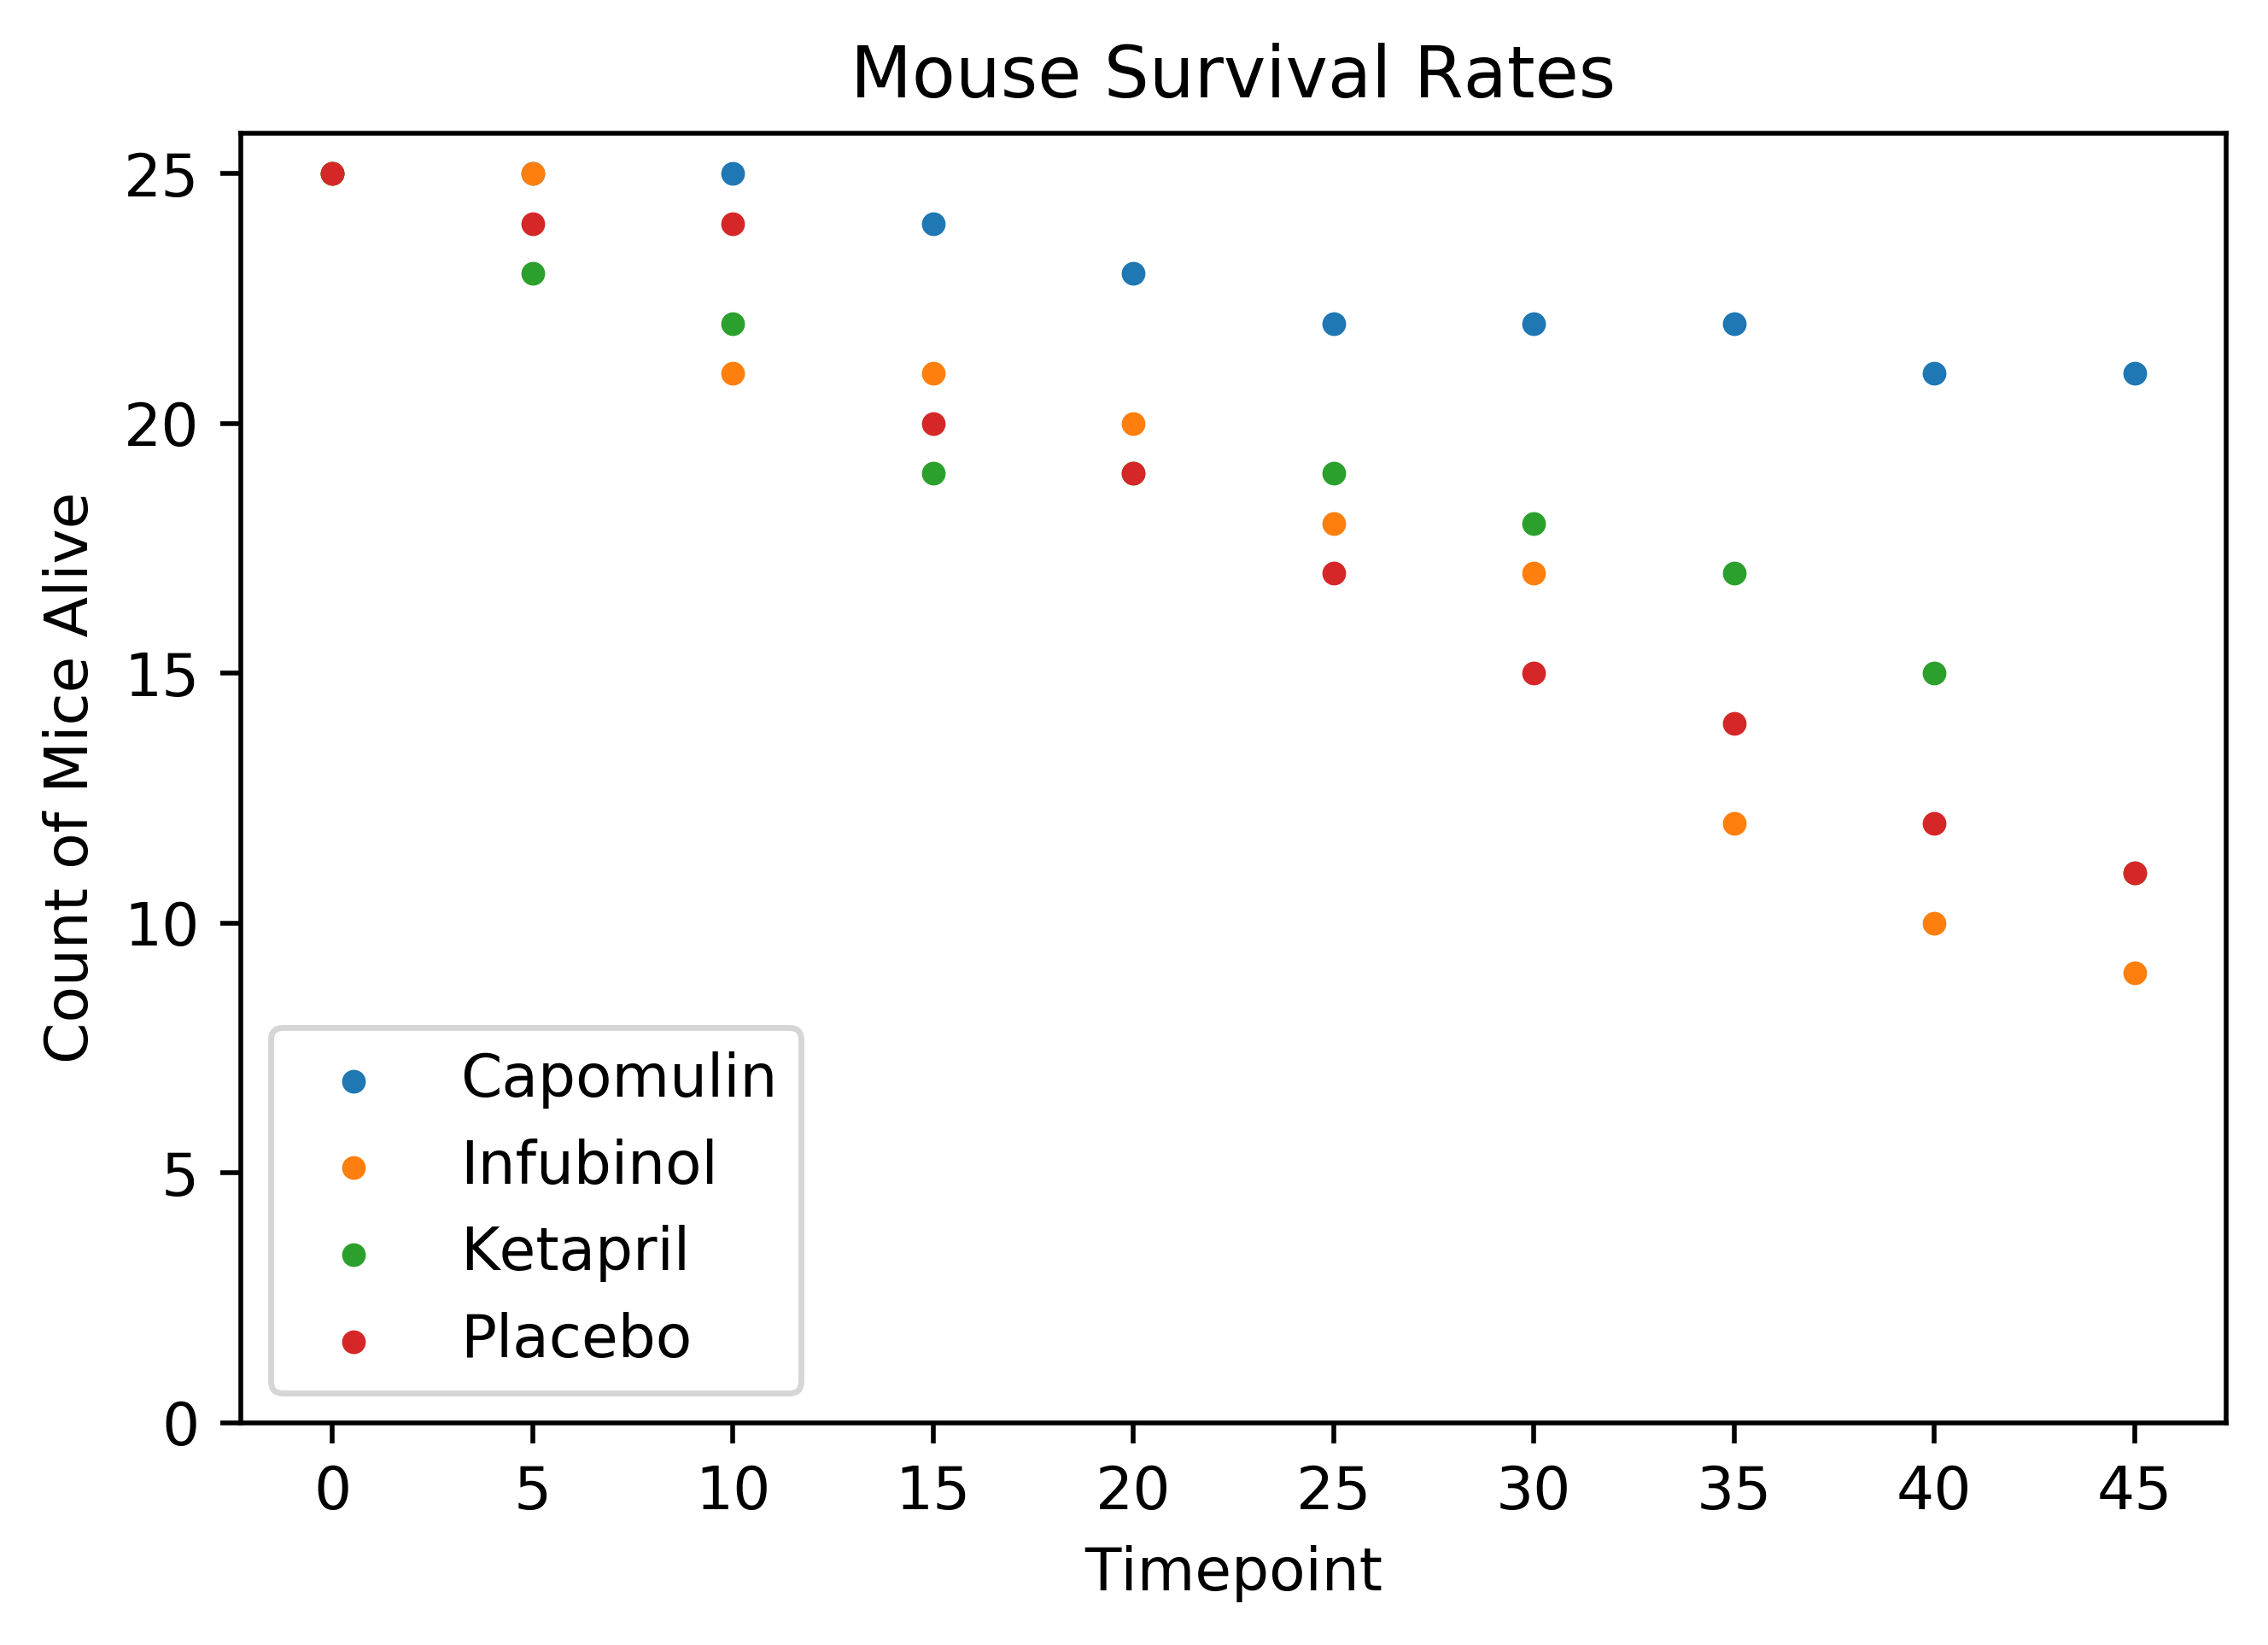

In [327]:
# Generate the Plot (Accounting for percentages)

fig, ax = plt.subplots()

for drug in drug_names:
    ax.scatter(x_axis, transposed_by_mouse[drug], label=drug, marker='.')
               
               # Save the Figure

plt.title('Mouse Survival Rates')
plt.ylabel('Count of Mice Alive')
plt.xlabel('Timepoint')
plt.xticks(np.arange(0, 50, step=5))
plt.yticks(np.arange(0, 30, step=5))
plt.legend(loc='lower left')
plt.rcParams['figure.dpi'] = 500

# Save the Figure
plt.savefig('Survival Rates.png')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [308]:
# Calculate the percent changes for each drug

percent_change = ((transposed_mean_tumor_volume.iloc[-1,] - 45) / 45)*100

# Display the data to confirm
print((percent_change))

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [311]:
# Store all Relevant Percent Changes into a Tuple

t = tuple(percent_change)

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

TypeError: '>' not supported between instances of 'tuple' and 'int'

![Metastatic Spread During Treatment](../Images/change.png)